#1.Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#2. Loading the datasheet

In [ ]:
data=pd.read_csv("abalone.csv")

In [ ]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
data.drop(columns=["Sex"],inplace = True)

In [ ]:
data.tail()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


#3. Perform Below Visualization

##Univariate

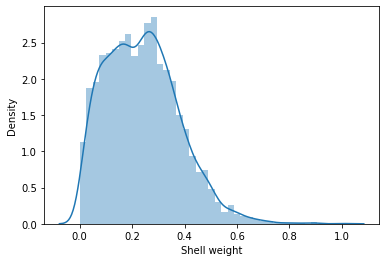

In [ ]:
sns.distplot(data['Shell weight'])

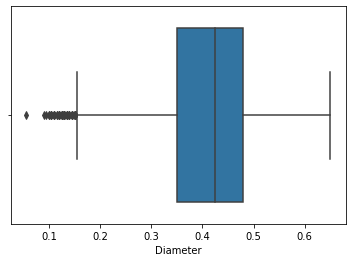

In [ ]:
sns.boxplot(data["Diameter"])

##Bi-variate Analysis 

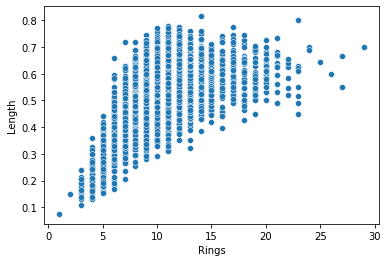

In [ ]:
sns.scatterplot(data.Rings,data.Length)

##Multivarient Analysis

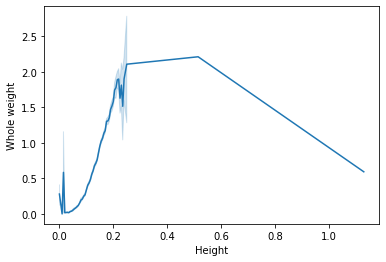

In [ ]:
sns.lineplot(data['Height'],data['Whole weight'])

#4.Perform descriptive statistics on the dataset

In [ ]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
data.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [ ]:
print("Mean:",data['Length'].mean())
print("Mean:",round(data['Length'].mean(),2))

Mean: 0.5239920995930094
Mean: 0.52


In [ ]:
print("Median:",data['Length'].median())

Median: 0.545


In [ ]:
print("Mode:",data['Length'].mode())

Mode: 0    0.550
1    0.625
dtype: float64


In [ ]:
print("Standard Deviation",data['Length'].std())

Standard Deviation 0.12009291256479956


In [ ]:
print("Range=",round(data["Length"].max()-data["Length"].min(),2))

Range= 0.74


#5.Checking for missing values and deal with them

In [ ]:
df.isnull().sum()

Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [ ]:
df.isnull().any()

Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Rings             False
dtype: bool

#6.Find the Outliers and replace the outliers

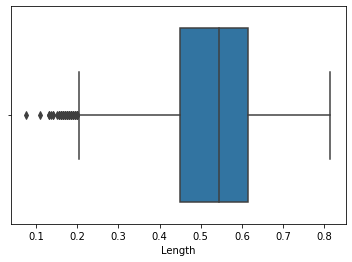

In [ ]:
sns.boxplot(data.Length)

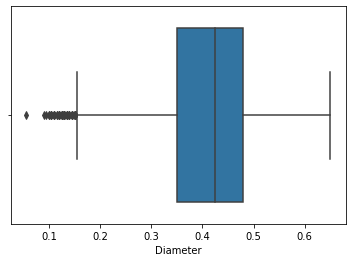

In [ ]:
sns.boxplot(data.Diameter)

In [ ]:
iq=data.quantile(q=[0.75,0.25])
iq

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0.75,0.615,0.48,0.165,1.1530,0.502,0.2530,0.329,11.0
0.25,0.450,0.35,0.115,0.4415,0.186,0.0935,0.130,8.0


In [ ]:
iq.iloc[0]
iq.iloc[1]
IQR = iq.iloc[0] - iq.iloc[1]
upper_extrem = iq.iloc[0] + ( 1.5 * IQR)  
lower_extrem = iq.iloc[1] - ( 1.5 * IQR)   
upper_extrem

Length             0.86250
Diameter           0.67500
Height             0.24000
Whole weight       2.22025
Shucked weight     0.97600
Viscera weight     0.49225
Shell weight       0.62750
Rings             15.50000
dtype: float64

In [ ]:
lower_extrem

Length            0.20250
Diameter          0.15500
Height            0.04000
Whole weight     -0.62575
Shucked weight   -0.28800
Viscera weight   -0.14575
Shell weight     -0.16850
Rings             3.50000
dtype: float64

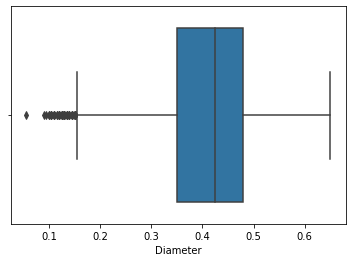

In [ ]:
sns.boxplot(data.Diameter)

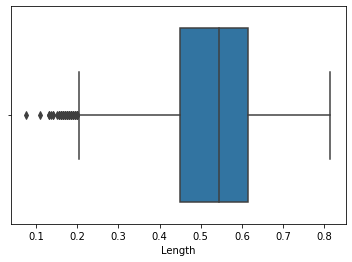

In [ ]:
sns.boxplot(data.Length)

#7.CHECK CATEGORICAL COLUMNS AND PERFORM ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.main=le.fit_transform(data.Rings)
data.main

array([14,  6,  8, ...,  8,  9, 11])

In [ ]:
data.main=pd.get_dummies(data.Rings)
data.main

,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,29
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4172,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4173,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4174,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4175,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
pd.get_dummies(data).tail()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,0.565,0.450,0.165,1289,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,1411,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1727,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1610,0.5310,0.2610,0.2960,10
4176,0.710,0.555,0.195,2348,0.9455,0.3765,0.4950,12


#8.Split the data into dependent and independent variables

In [ ]:
K=data.iloc[:,0:4]
print(K)

      Length  Diameter  Height  Whole weight
0      0.455     0.365   0.095           715
1      0.350     0.265   0.090           285
2      0.530     0.420   0.135           962
3      0.440     0.365   0.125           718
4      0.330     0.255   0.080           253
...      ...       ...     ...           ...
4172   0.565     0.450   0.165          1289
4173   0.590     0.440   0.135          1411
4174   0.600     0.475   0.205          1727
4175   0.625     0.485   0.150          1610
4176   0.710     0.555   0.195          2348

[4177 rows x 4 columns]


In [ ]:
J=data.iloc[:15,3].values
print(J)

[ 715  285  962  718  253  463 1109 1097  706 1301  858  548  757  972
  657]


#9.Scale the independent variables

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
x = data[["Whole weight","Shell weight"]]
scale = StandardScaler()
st_scale = scale.fit_transform(x)
st_scale

array([[-0.6673621 , -0.63821689],
       [-1.31885041, -1.21298732],
       [-0.2931351 , -0.20713907],
       ...,
       [ 0.86590805,  0.49695471],
       [ 0.68864263,  0.41073914],
       [ 1.80677838,  1.84048058]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler(feature_range=(0,1))
norm = min_max.fit_transform(x)
norm

array([[0.29448105, 0.14798206],
       [0.11738056, 0.06826109],
       [0.39621087, 0.2077728 ],
       ...,
       [0.71128501, 0.30543099],
       [0.6630972 , 0.29347285],
       [0.96705107, 0.49177877]])

#10.Split the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
y = data["Rings"]
x = data.drop(columns = ["Rings"])
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3341, 7), (836, 7), (3341,), (836,))

In [ ]:
x_test

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
866,0.605,0.455,0.160,1624,0.4210,0.3015,0.325
1483,0.590,0.440,0.150,1265,0.3870,0.2150,0.245
599,0.560,0.445,0.195,1436,0.3050,0.2245,0.335
1702,0.635,0.490,0.170,1838,0.5385,0.2665,0.380
670,0.475,0.385,0.145,875,0.2350,0.1080,0.215
...,...,...,...,...,...,...,...
3093,0.520,0.430,0.150,1039,0.3020,0.1575,0.235
1651,0.595,0.435,0.150,1308,0.4175,0.1700,0.265
2897,0.545,0.430,0.150,1060,0.3525,0.1580,0.208
3953,0.465,0.355,0.120,815,0.2550,0.0915,0.184


In [ ]:
y_test

866      9
1483     8
599     16
1702     9
670     14
        ..
3093    11
1651     8
2897    10
3953     8
1830     7
Name: Rings, Length: 836, dtype: int64

In [ ]:
x_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
4038,0.550,0.445,0.125,954,0.2880,0.1365,0.210
1272,0.475,0.355,0.100,700,0.2535,0.0910,0.140
3384,0.305,0.225,0.070,172,0.0585,0.0335,0.045
3160,0.275,0.200,0.065,128,0.0565,0.0130,0.035
3894,0.495,0.380,0.135,891,0.2630,0.1425,0.215


In [ ]:
x_test.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
866,0.605,0.455,0.160,1624,0.4210,0.3015,0.325
1483,0.590,0.440,0.150,1265,0.3870,0.2150,0.245
599,0.560,0.445,0.195,1436,0.3050,0.2245,0.335
1702,0.635,0.490,0.170,1838,0.5385,0.2665,0.380
670,0.475,0.385,0.145,875,0.2350,0.1080,0.215


In [ ]:
x_test.shape,x_train.shape

((836, 7), (3341, 7))

#11. Build Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [ ]:
model = DecisionTreeClassifier()
R_model  = RandomForestClassifier()
log_reg = LogisticRegression()
nb = GaussianNB()

In [ ]:
model.fit(x_train,y_train) 
R_model.fit(x_train,y_train)
log_reg.fit(x_train,y_train)
nb.fit(x_train,y_train)

GaussianNB()

In [ ]:
pred1 = model.predict(x_test)
pred2= log_reg.predict(x_test)
pred3=R_model.predict(x_test)
pred4 = nb.predict(x_test)
pred1,pred2,pred3,pred4

(array([ 9, 12, 17, 11, 14,  9,  8,  8,  5, 14, 12, 12,  8, 10,  7, 19, 10,
        15, 11,  7, 17, 10, 11,  9,  9,  6,  9,  7, 10,  8, 13,  9,  5,  8,
         9, 11,  6,  3,  7,  6, 10, 24,  9,  9, 10, 11,  8,  8, 15,  5,  5,
        16,  9,  4,  7, 13, 10, 13, 10,  9, 12, 16, 12,  7,  7, 11,  4,  7,
         8,  9,  9, 11, 10,  7,  7, 14, 16, 11, 10,  9, 14, 14,  9,  8,  6,
        11,  9,  8, 11, 14, 11, 10,  9, 10, 11,  9,  8,  9,  8,  7, 10,  8,
         9,  8, 10, 13, 12,  9,  9, 10, 10,  9, 10,  9, 10,  5, 10,  9, 10,
         9,  8, 10,  8, 11, 14, 11, 13,  9, 11, 16,  9,  9, 11,  4,  5,  7,
         9, 11,  5, 19,  8,  9, 11, 11, 11, 19, 12,  8,  9, 15,  8, 12, 16,
        10, 10,  9, 12,  5,  9,  5, 12,  6,  9, 11,  7, 14, 11, 12, 10,  8,
        11, 12,  9,  9,  7, 12,  9,  9, 10, 10, 14,  7,  6,  8,  7,  9,  7,
         9, 11,  6,  8, 10, 17, 14,  9,  9, 12, 12, 21, 11,  8, 12, 13, 10,
        10, 11, 11,  9,  8,  8,  6, 11, 20,  8, 10, 11, 10,  6, 13, 16, 12,
        10, 

#12.Train the model

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [ ]:
tr_pred1=model.predict(x_train)
a=accuracy_score(y_train,tr_pred1)
print("Accuracy_score",a)

Accuracy_score 1.0


In [ ]:
tr_pred2=R_model.predict(x_train)
a=accuracy_score(y_train,tr_pred2)
print("Accuracy_score",a)

Accuracy_score 1.0


In [ ]:
tr_pred3=log_reg.predict(x_train)
a=accuracy_score(y_train,tr_pred3)
print("Accuracy_score",a)

Accuracy_score 0.1481592337623466


In [ ]:
tr_pred4=nb.predict(x_train)
a=accuracy_score(y_train,tr_pred4)
print("Accuracy_score",a)

Accuracy_score 0.24244238252020353


#13.Test the model

In [ ]:
tr_pred1=model.predict(x_test)
a=accuracy_score(y_test,tr_pred1)
print("Accuracy_score",a)

Accuracy_score 0.20454545454545456


In [ ]:
tr_pred2=R_model.predict(x_test)
a=accuracy_score(y_test,tr_pred2)
print("Accuracy_score",a)

Accuracy_score 0.24880382775119617


In [ ]:
tr_pred3=log_reg.predict(x_test)
a=accuracy_score(y_test,tr_pred3)
print("Accuracy_score",a)

Accuracy_score 0.16626794258373206


In [ ]:
tr_pred4=nb.predict(x_test)
a=accuracy_score(y_test,tr_pred4)
print("Accuracy_score",a)

Accuracy_score 0.2236842105263158


#14. Measure the Performance for Metrics

In [ ]:
print("Accuracy score :",accuracy_score(y_test,pred1))
print("Precision score :",precision_score(y_test,pred1,average="macro"))
print("Confustion matrix :",confusion_matrix(y_test,pred1))

Accuracy score : 0.20454545454545456
Precision score : 0.13301030360857055
Confustion matrix : [[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  3  4  2  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  8  8 10  4  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  8 11 10 10  5  1  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  3 19 18 16  9  7  4  3  1  1  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  2  5 13 27 24 12  4  9  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  8 16 39 32 23  5  9  4  2  0  1  0  1  0  0  0  0  0]
 [ 0  0  0  1  2  1 18 30 29 26 11  6  5  3  3  1  1  1  1  0  0  0  0]
 [ 0  0  0  0  0  5  8 23 20 19  5  5  1  2  4  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  5 12  8  5  5  3  0  3  2  0  1  1  1  0  1  1]
 [ 0  0  0  0  0  3  4  2  2  6  6  2  4  0  1  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  3  4  2  4  2  0  2 

In [ ]:
print("Accuracy score :",accuracy_score(y_test,pred2))
print("Precision score :",precision_score(y_test,pred2,average="macro"))
print("Confustion matrix :",confusion_matrix(y_test,pred2))

Accuracy score : 0.16626794258373206
Precision score : 0.00801337484146201
Confustion matrix : [[  0   0   0   0   0   1   2   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   1   2  10   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   0   4  28   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   0   0  48   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   0   0  84   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   0   0  99   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   0   0 142   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   0   0 139   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   0   0  93   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   0   0  51   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0  

In [ ]:
print("Accuracy score :",accuracy_score(y_test,pred3))
print("Precision score :",precision_score(y_test,pred3,average="macro"))
print("Confustion matrix :",confusion_matrix(y_test,pred3))

Accuracy score : 0.24880382775119617
Precision score : 0.16007007480003088
Confustion matrix : [[ 1  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  6  5  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  9 11  5  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5 15 17  8  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2 15 27 25 12  0  1  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  3 14 35 27 12  5  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  8 34 44 35 14  1  2  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  6 15 44 32 23  7  8  0  0  3  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  7 22 19 27  6  6  1  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  1  1  3  4 14 17  2  7  1  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  3  6  8  6  0  3  2  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  5  3  8  2  0  3  2  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  8  2  1  4  2  0  0  1  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  2  1  2  2  1  1  1  1  1 

In [ ]:
print("Accuracy score :",accuracy_score(y_test,pred4))
print("Precision score :",precision_score(y_test,pred4,average="macro"))
print("Confustion matrix :",confusion_matrix(y_test,pred4))

Accuracy score : 0.2236842105263158
Precision score : 0.08239912949208629
Confustion matrix : [[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 9  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 7 11 10  2  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4 20  9 12  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 16 21 25 14  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  5 25 25 33  3  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3 11 16 19 46 20 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  6 13 16 36 16 46  0  0  0  0  0  0  0  0  3  0  0  0  2  0]
 [ 0  0  2  2  4  9 19  5 49  0  0  0  0  0  0  0  0  0  0  0  0  3  0]
 [ 0  0  0  1  3  5 14  6 18  0  0  0  0  0  0  0  0  1  0  0  0  3  0]
 [ 0  0  1  1  3  3  6  7  7  0  0  0  0  0  0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  7  9  3  6  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  5  6  8  1  0  0  0  0  